(578, 2)
         Date  count
0  2012-08-25      3
1  2012-08-26      3
2  2012-08-27      2
3  2012-08-28      2
4  2012-08-29      2


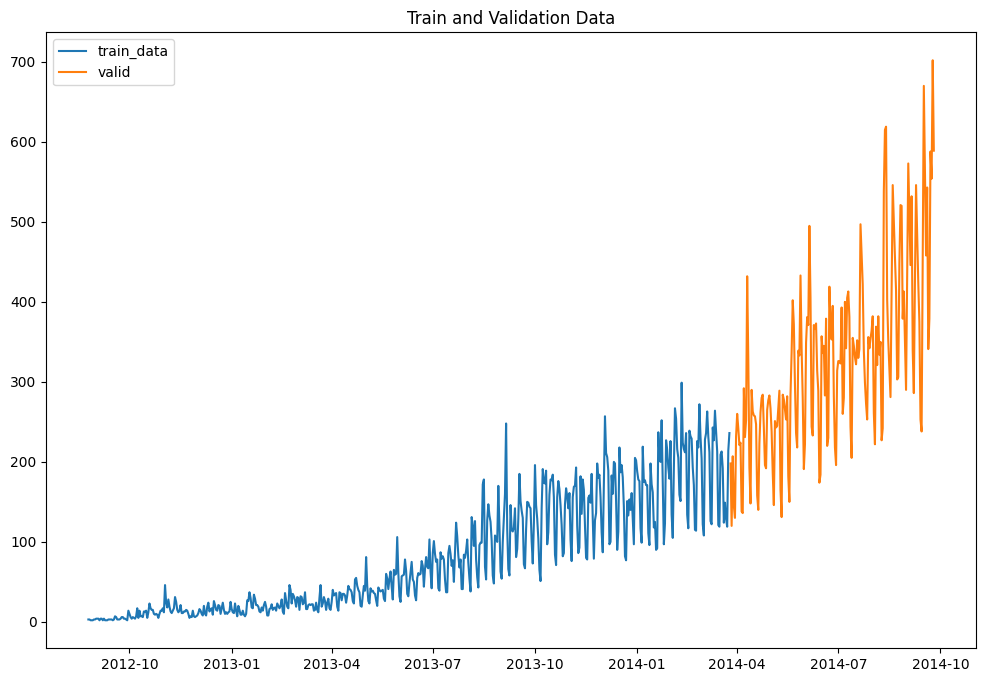

11:27:13 - cmdstanpy - INFO - Chain [1] start processing


                  Date  count
Date                         
2012-08-25  2012-08-25      3
2012-08-26  2012-08-26      3
2012-08-27  2012-08-27      2
2012-08-28  2012-08-28      2
2012-08-29  2012-08-29      2


11:27:13 - cmdstanpy - INFO - Chain [1] done processing


184
            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2012-08-25    0.664100  -57.183614    6.822695     0.664100     0.664100   
1   2012-08-26    0.794731  -60.406305    0.581611     0.794731     0.794731   
2   2012-08-27    0.925363  -16.160643   45.511078     0.925363     0.925363   
3   2012-08-28    1.055994  -13.689305   48.154610     1.055994     1.055994   
4   2012-08-29    1.186625  -19.166180   43.808470     1.186625     1.186625   
..         ...         ...         ...         ...          ...          ...   
757 2014-09-21  291.407685  228.388414  295.546598   282.157408   299.657051   
758 2014-09-22  291.888947  271.239393  338.125157   282.578739   300.155606   
759 2014-09-23  292.370208  273.452370  340.262664   283.000684   300.654161   
760 2014-09-24  292.851470  271.378174  336.220150   283.423378   301.210189   
761 2014-09-25  293.332732  270.158557  337.325790   283.846072   301.858820   

     additive_terms  additive_terms

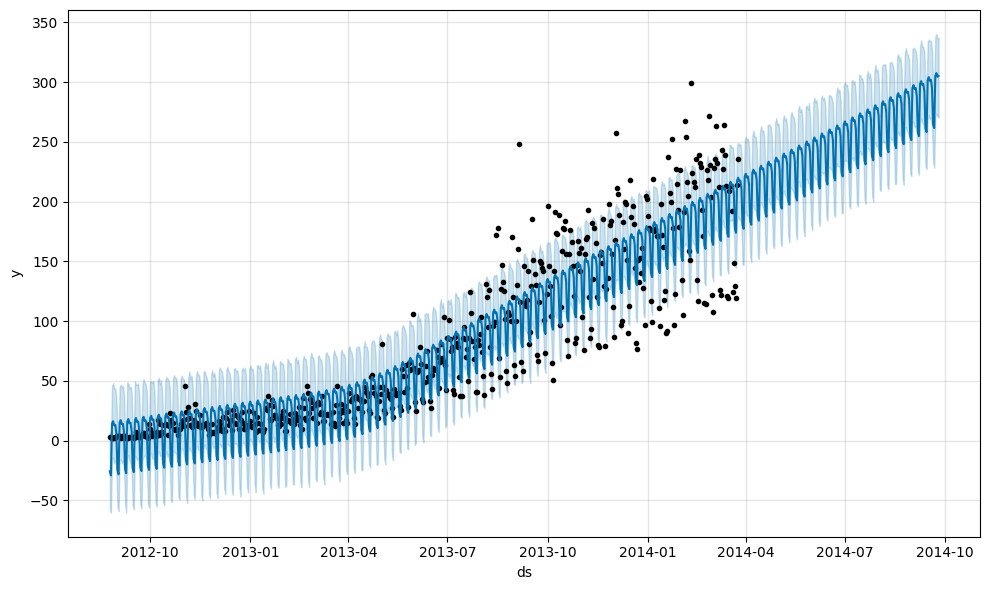

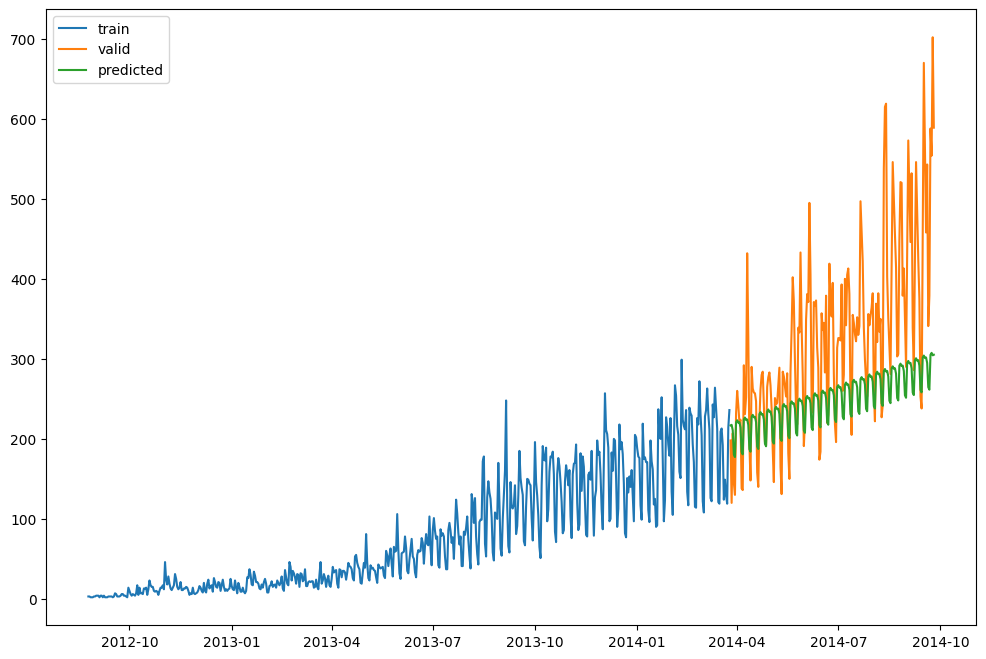

The RMSE value for Prophet is 118.49552068644583


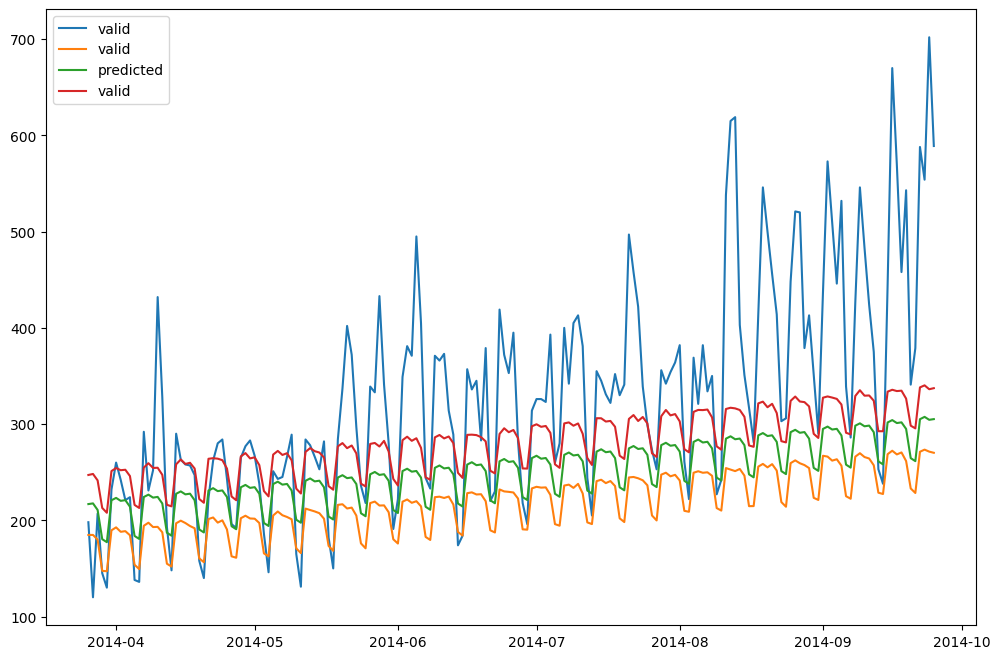

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 


import warnings
warnings.filterwarnings("ignore")


train_data = pd.read_csv("/Users/paramanandbhat/Downloads/8._prophet/data/train_data.csv")
valid_data = pd.read_csv("/Users/paramanandbhat/Downloads/8._prophet/data/valid_data.csv")

print(train_data.shape)
print(train_data.head())

# Required Preprocessing 

train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

from prophet import Prophet

print(train_data.head())

#Input in prophet needs to be date and target variable

df = train_data[['Date', 'count']]

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

df.head()

model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=184,freq="D")
forecast = model.predict(future)
fig = model.plot(forecast)

train_data.shape, valid_data.shape

print(len(forecast['yhat'][578:].values))

print(forecast)

valid_data['prophet'] =  forecast['yhat'][578:].values

plt.figure(figsize=(12,8))

plt.plot(train_data['count'],  label='train') 
plt.plot(valid_data['count'],  label='valid') 
plt.plot(valid_data['prophet'],  label='predicted') 
plt.legend(loc='best') 
plt.show()


# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['prophet']))
print('The RMSE value for Prophet is', rmse)


forecast.index= forecast.ds

plt.figure(figsize=(12,8))

plt.plot(valid_data['count'],  label='valid') 
plt.plot(forecast['yhat_lower'][578:],  label='valid') 
plt.plot(forecast['yhat'][578:],  label='predicted') 
plt.plot(forecast['yhat_upper'][578:],  label='valid') 

plt.legend(loc='best') 
plt.show()